In [1]:
import tensorflow as tf
import numpy as np

tf.logging.set_verbosity(tf.logging.ERROR)

In [2]:
celsius_q = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit_a = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [4]:
l0 = tf.keras.layers.Dense(units=1,          # num of neurons in the layer
                           input_shape=[1]   # 1-d array with 1 val
                          )

In [5]:
model = tf.keras.Sequential([l0])

In [6]:
## Compile: with loss and optimizer funcs
lr = 0.1
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(lr))

In [8]:
## train
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)

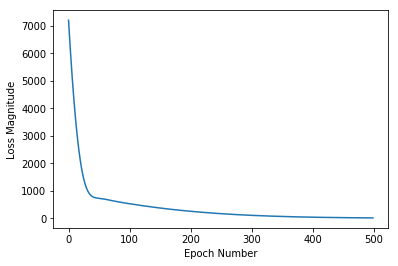

In [11]:
# Display training statistics
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])

In [12]:
# predict
print(model.predict([100.0, 0]))

[[211.28369 ]
 [ 28.487564]]


In [13]:
# Looking at the layer weights
print("Layer variables:", l0.get_weights())

Layer variables: [array([[1.8279612]], dtype=float32), array([28.487564], dtype=float32)]


In [15]:
# For fun
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model1 = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print(model.predict([100.0, 0]))
print("L0 variables:", l0.get_weights())
print("L1 variables:", l1.get_weights())
print("L2 variables:", l2.get_weights())

[[211.74744 ]
 [ 31.952526]]
L0 variables: [array([[-0.29377586,  1.0490355 ,  0.542766  , -0.5698205 ]],
      dtype=float32), array([0., 0., 0., 0.], dtype=float32)]
L1 variables: [array([[-0.40278763, -0.51030326, -0.01920748,  0.0250423 ],
       [-0.83168113,  0.6753375 ,  0.4488538 ,  0.04695565],
       [ 0.1766426 , -0.10631764, -0.6790138 , -0.18713385],
       [ 0.01318723, -0.43908414, -0.31593925,  0.6504627 ]],
      dtype=float32), array([0., 0., 0., 0.], dtype=float32)]
L2 variables: [array([[-0.04235101],
       [-0.51316684],
       [-0.30499327],
       [-0.9129526 ]], dtype=float32), array([0.], dtype=float32)]
